<font color='GREY'> Prevendo Esgotamento dos Funcionários no Sistema Financeiro</font>

Você é um Cientista de Dados em uma empresa. Você tem a tarefa de compreender e observar a saúde mental de todos os funcionários de sua empresa. 

Portanto, você deve **prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas.

Fonte: https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge

### Tratando a base de dados

In [5]:
#Importando bibliotecas e dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [38]:
dados = pd.read_csv("RH_Data_Fatige.csv")
dados['IDFuncionario'] = pd.factorize(dados['Employee ID'])[0] 
dados.drop(columns='Employee ID', inplace=True)

In [53]:
nomes = ['DataEntrada','Sexo','Tipoempresa','SetupCompativel','TempodeCasa','HorasTrabDia','EscoreFadigaMental','Burn Rate','ID']         
dados.columns = nomes
dados.head(3)

,DataEntrada,Sexo,Tipoempresa,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate,ID
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1
2,2008-03-10,Female,Product,Yes,2,0.452005,5.8,0.49,2


In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DataEntrada         22750 non-null  datetime64[ns]
 1   Sexo                22750 non-null  category      
 2   Tipoempresa         22750 non-null  category      
 3   SetupCompativel     22750 non-null  category      
 4   TempodeCasa         22750 non-null  int64         
 5   HorasTrabDia        22750 non-null  float64       
 6   EscoreFadigaMental  22750 non-null  float64       
 7   Burn Rate           22750 non-null  float64       
 8   ID                  22750 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(2)
memory usage: 1.1 MB


In [51]:
dados.duplicated().sum()

0

In [42]:
# Transformando variáveis objeto em categoricas para reduzir o uso da memória
categoricas = ['Sexo', 'Tipoempresa', 'SetupCompativel']
for c in categoricas:
    dados[c] = dados[c].astype('category')

In [43]:
dados['DataEntrada'] = dados['DataEntrada'].astype('datetime64')

In [44]:
dados['TempodeCasa'] = dados['TempodeCasa'].astype('int64') # Convertendo coluna string em float

In [45]:
dados.isnull().sum()

DataEntrada              0
Sexo                     0
Tipoempresa              0
SetupCompativel          0
TempodeCasa              0
HorasTrabDia          1381
EscoreFadigaMental    2117
Burn Rate             1124
ID                       0
dtype: int64

In [47]:
# substituindo campos vazios pela media
nulos = ['HorasTrabDia','EscoreFadigaMental','Burn Rate']
dados[nulos] = dados[nulos].replace({np.nan: dados['HorasTrabDia'].mean(), 
                                     np.nan: dados['EscoreFadigaMental'].mean(), 
                                     np.nan: dados['Burn Rate'].mean()})

In [48]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DataEntrada         22750 non-null  datetime64[ns]
 1   Sexo                22750 non-null  category      
 2   Tipoempresa         22750 non-null  category      
 3   SetupCompativel     22750 non-null  category      
 4   TempodeCasa         22750 non-null  int64         
 5   HorasTrabDia        22750 non-null  float64       
 6   EscoreFadigaMental  22750 non-null  float64       
 7   Burn Rate           22750 non-null  float64       
 8   ID                  22750 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(2)
memory usage: 1.1 MB


### Análise Exploratória dos Dados

In [22]:
import sweetviz as sv
rel = sv.analyze(dados, target_feat='Target')
rel.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Engenharia de Atributos

In [87]:
# LabelEncoder - Variáveis não numéricas
dados['Sexo'] = dados['Sexo'].map({'Male':1,'Female':0})
dados['SetupCompativel'] = dados['SetupCompativel'].map({'Yes':1,'No':0})
dados['Tipoempresa'] = dados['Tipoempresa'].map({'Service':1,'Product':0})
dados.head(3)

,DataEntrada,Sexo,Tipoempresa,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate,ID,Burnout
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,Alto
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,Baixo
2,2008-03-10,Female,Product,Yes,2,0.452005,5.8,0.49,2,Moderado


### Clusterização

In [54]:
# Importando bilbiotecas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
# Criando um dataset agrupando as colunas necessárias
cluster = dados.copy()
cluster.drop(columns=['DataEntrada', 'Sexo', 'Tipoempresa', 'ID'], inplace=True)
cluster['SetupCompativel'] = cluster['SetupCompativel'].map({'No':0, 'Yes':1})
cluster.head(3)

,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate
0,0,2,3.000000,3.8,0.16
1,1,1,2.000000,5.0,0.36
2,1,2,0.452005,5.8,0.49


In [65]:
# Passando os dados dos clientes para o formato de matriz
cluster1 = cluster.values
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(cluster1)
matriz

array([[-1.08395212, -0.15745059, -0.56089569, -0.60221802, -1.51092248],
       [ 0.92254997, -1.03841492, -1.01440094, -0.0993965 , -0.47606341],
       [ 0.92254997, -0.15745059, -1.7164246 ,  0.23581785,  0.19659499],
       ...,
       [ 0.92254997,  0.72351373,  1.25312533, -2.0050878 ,  1.38668292],
       [-1.08395212, -0.15745059,  0.34611482,  0.27771965,  0.35182385],
       [-1.08395212,  0.72351373,  0.79962007,  1.07385373,  0.81751043]])

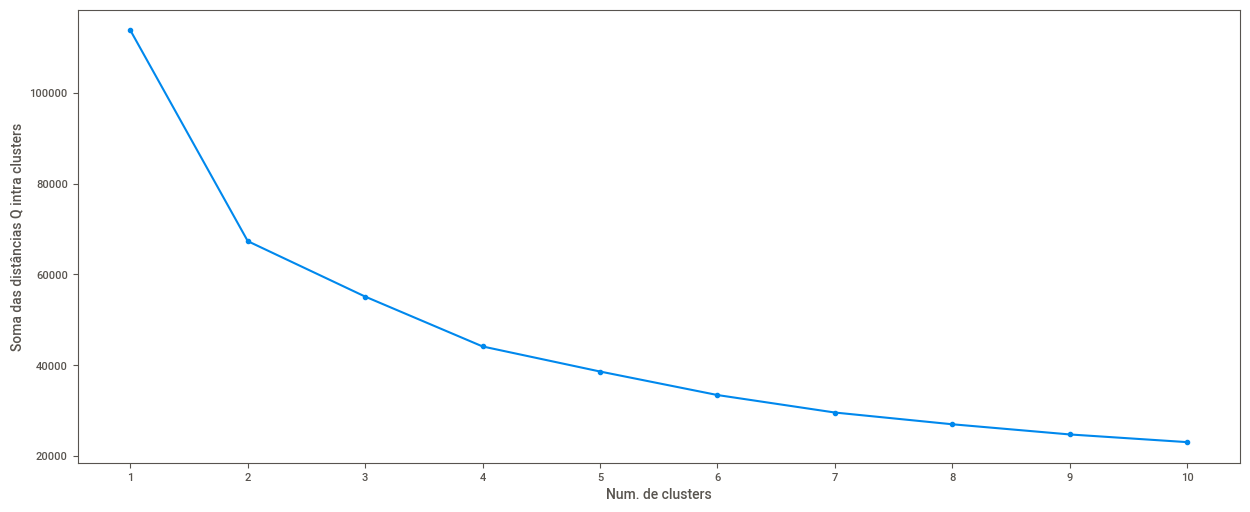

In [66]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means
ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster
for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)   
    # Fitando os dados no modelo
    model.fit(matriz)    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [67]:
#Criando um modelo
modelo = KMeans(n_clusters=4)
modelo.fit(matriz)

KMeans(n_clusters=4)

In [68]:
# Adicionando os clusters na tabela de clientes
dados['Categoria'] = modelo.predict(matriz)
dados.head()

,DataEntrada,Sexo,Tipoempresa,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate,ID,Categoria
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,0
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,2
2,2008-03-10,Female,Product,Yes,2,0.452005,5.8,0.49,2,3
3,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,3,2
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,4,1


In [85]:
# Renomeando os clusters
dados['Burnout'] = dados['Categoria'].map({2:'Baixo', 3:'Moderado', 0:'Alto', 1:'Burnout'})
dados.drop(columns='Categoria', inplace=True)
dados.sample(9)

,DataEntrada,Sexo,Tipoempresa,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate,ID,Burnout
16457,2008-12-14,Female,Service,Yes,2,3.0,4.900000,0.28,16457,Moderado
4602,2008-05-11,Female,Product,No,3,7.0,6.200000,0.53,4602,Burnout
19634,2008-10-27,Female,Product,Yes,1,3.0,3.000000,0.19,19634,Baixo
17144,2008-11-15,Male,Product,No,4,8.0,6.700000,0.55,17144,Burnout
19521,2008-03-06,Male,Service,No,3,6.0,0.452005,0.42,19521,Alto
8578,2008-09-04,Male,Service,Yes,3,7.0,6.100000,0.55,8578,Moderado
11491,2008-09-02,Male,Service,Yes,2,5.0,0.452005,0.66,11491,Moderado
16174,2008-07-16,Male,Service,Yes,1,3.0,0.452005,0.50,16174,Baixo
5160,2008-08-24,Male,Service,No,1,5.0,7.000000,0.53,5160,Alto


In [86]:
dados.Burnout.value_counts()

Moderado    7145
Alto        5561
Baixo       5145
Burnout     4899
Name: Burnout, dtype: int64

In [131]:
dados1 = dados[['ID', 'Burnout']]
dados1.to_csv('tabelaBurnFuncionarios.csv')

### Modelagem  e Avaliação (ML)


In [88]:
dados.head(3)

,DataEntrada,Sexo,Tipoempresa,SetupCompativel,TempodeCasa,HorasTrabDia,EscoreFadigaMental,Burn Rate,ID,Burnout
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,Alto
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,Baixo
2,2008-03-10,Female,Product,Yes,2,0.452005,5.8,0.49,2,Moderado


In [94]:
# Criando variáveis ​​independentes alvo
X = dados.drop(columns=['DataEntrada', 'Burn Rate', 'Sexo',	'Tipoempresa','Burnout'], axis=1)
X['SetupCompativel'] = X['SetupCompativel'].map({'No':0,'Yes':1})
X= X.values
y = dados["Burn Rate"].values

In [95]:
# Separando dados de treino e teste
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state= 42)

In [96]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Avaliação dos modelos
from sklearn.metrics import mean_squared_error, r2_score
import math

In [97]:
# Construindo os modelos
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor(n_estimators=200)
# treinamento dos modelos
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_predict= lgb_model.predict(X_test)
y_predict

array([0.27950595, 0.5463026 , 0.38251054, ..., 0.59212359, 0.61934419,
       0.46044915])

In [109]:
z_predict= xgb_model.predict(X_test)
z_predict

array([0.2746803 , 0.5325539 , 0.37605062, ..., 0.58916247, 0.6117925 ,
       0.4591137 ], dtype=float32)

In [100]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, y_predict)

0.8572252160299196

In [101]:
# Calculo da métrica R2 do nosso modelo
r2_score(y_test, lgb_model.fit(X_train, y_train).predict(X_test))

0.8572252160299196

In [110]:
# Calculo da métrica R2 do nosso modelo
r2_score(y_test, xgb_model.fit(X_train, y_train).predict(X_test))

0.8536687995819077

In [106]:
#RMSE - O erro médio
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE: {:.2f}".format(Rmse_test))

RMSE: 0.07
